# Testing the estimation procedure with fake data

In [1]:
from arma_mle import mlePanelARMA
from ar_mle import mlePanelAR
import numpy as np
import matplotlib.pyplot as plt

## AR(1) Model:

In [2]:
ar = mlePanelAR(N=200, T = 16, K = 3)

Generate fake data and demean variables:

In [3]:
# Test Model E.A:
#----------------

y, X = ar.generateFakeData()

y_demean, xx_demean, YY_mean, XX_mean = ar.demeanVariables(y,X)



Estimate:

In [4]:
# Model 1
fun = lambda parameters: ar.objectiveFunction(y_demean,
                                                xx_demean,
                                                parameters,
                                                ar.maximumLikelihood)

aalpha0 = [0., 0., 0]
bbeta0 = [.0]
initial_parameters = np.array(aalpha0+bbeta0+[.4])


result = ar.optimize(fun, initial_parameters)

parameters_hat = result.x
print('Parameters:', parameters_hat)

Optimization terminated successfully.
         Current function value: 1605.726458
         Iterations: 1106
         Function evaluations: 1874
Parameters: [0.31737625 0.47728305 2.01320735 0.57515956 0.42935775]


## Plot estimated parameters against true ones

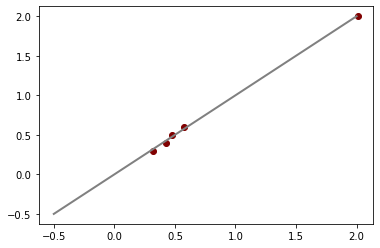

In [5]:
plt.scatter(parameters_hat, ar.true_parameters[:5], color = 'maroon')
plt.plot(np.linspace(-.5,2),np.linspace(-.5,2), color = 'gray', linewidth=2)
plt.show()

<!-- ## Cheff Kiss -->
<!-- ![chefkiss](https://media.giphy.com/media/3o7aCWJavAgtBzLWrS/giphy.gif "chefkiss") -->

## ARMA(1,1) Model

Generate data and demean variables:

In [6]:
arma = mlePanelARMA(N=200, T = 16, K = 3)

In [7]:
# Test Model E.A:
#----------------

y, X = arma.generateFakeData()

y_demean, xx_demean, YY_mean, XX_mean = arma.demeanVariables(y,X)

Estimate Parameters:

In [8]:
# Model 1
fun = lambda parameters: arma.objectiveFunction(y_demean,
                                                xx_demean,
                                                parameters,
                                                arma.maximumLikelihood)

aalpha0 = [0, 0, 0]
bbeta0 = [0]
phi0 = [0]
initial_parameters = np.array(aalpha0+bbeta0+phi0+[1.3])


result = arma.optimize(fun, initial_parameters)

parameters_hat = result.x
print(parameters_hat)

Optimization terminated successfully.
         Current function value: 1480.478273
         Iterations: 1641
         Function evaluations: 2597
[0.31885746 0.48112843 2.01175746 0.46796003 0.04437934 0.41057515]


## Plot estimated parameters against true ones

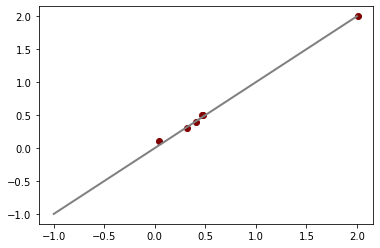

In [9]:
plt.scatter(parameters_hat, arma.true_parameters[:6], color = 'maroon')
plt.plot(np.linspace(-1,2),np.linspace(-1,2), color = 'gray', linewidth=2)
plt.show()

<!-- ![Celeb](https://media.giphy.com/media/DhstvI3zZ598Nb1rFf/giphy.gif "celeb") -->
